<a href="https://colab.research.google.com/github/tallapallimanasa26/Retail-Analytics-BI-Turning-Data-into-Decisions/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
orders = pd.read_csv("Orders.csv")
returns = pd.read_csv("Returns.csv")
people = pd.read_csv("People.csv")

In [ ]:
print(orders.shape)

(9994, 21)


In [ ]:
print(orders.head())

   Row ID        Order ID  Order Date   Ship Date        ShipMode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub Category  \
0       42420   Sout

In [ ]:
print(orders.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [ ]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['YearMonth'] = orders['Order Date'].dt.to_period('M')


In [ ]:
monthly_sales = orders.groupby('YearMonth')['Sales'].sum()

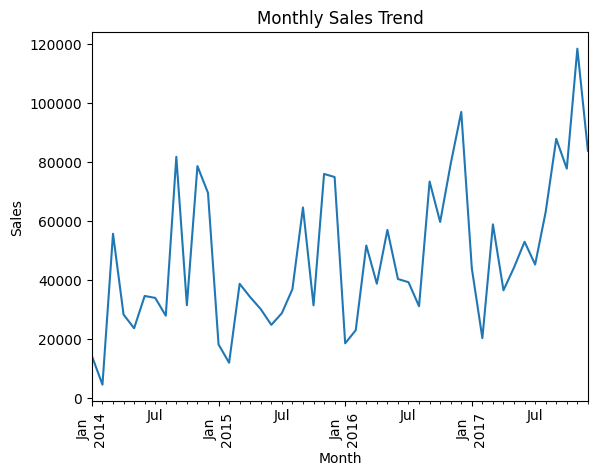

In [ ]:
plt.plot(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()


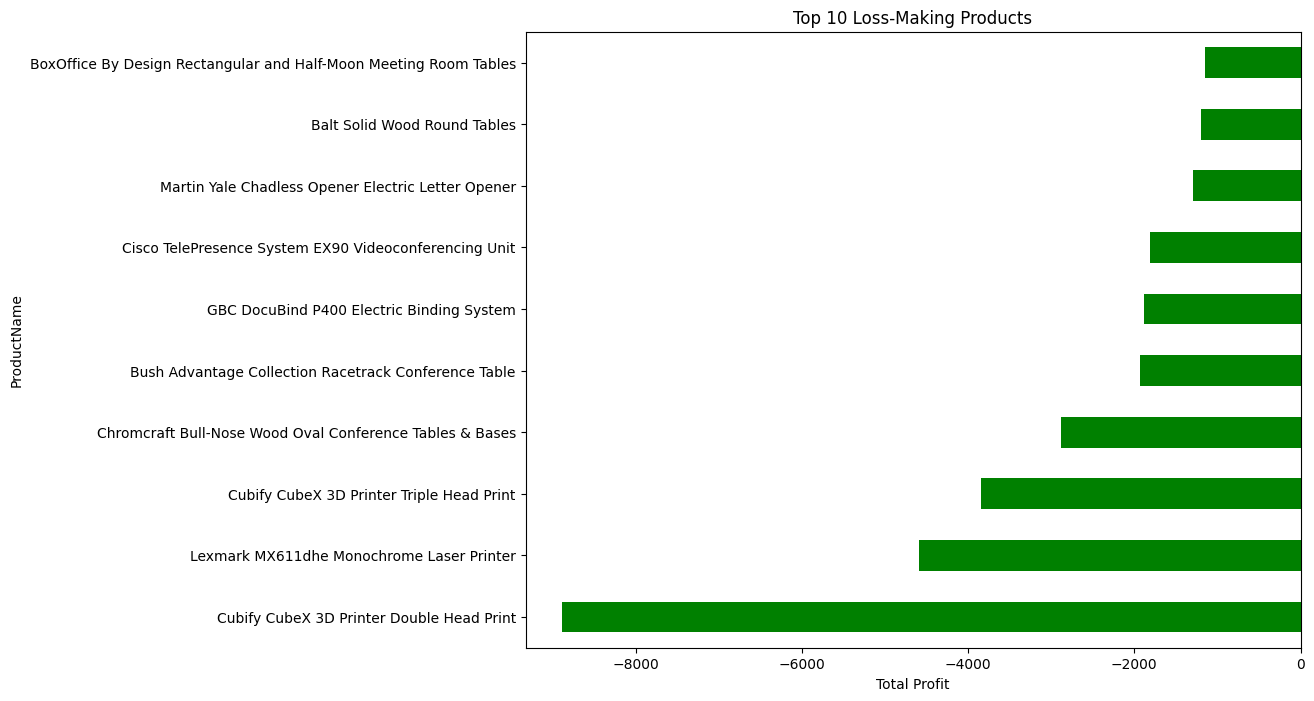

In [ ]:
loss = (orders.groupby('ProductName')['Profit']
                 .sum()
                 .sort_values())
loss.head(10).plot(kind='barh', figsize=(10,8), color="green")
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Total Profit")
plt.show()


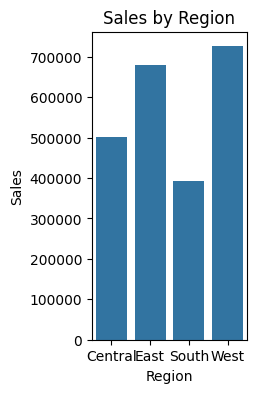

In [ ]:
region_sales = orders.groupby('Region')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize=(2,4))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title("Sales by Region")
plt.show()


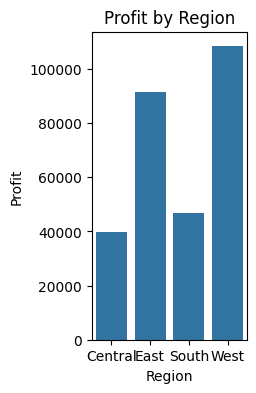

In [ ]:
plt.figure(figsize=(2,4))
sns.barplot(x='Region', y='Profit', data=region_sales)
plt.title("Profit by Region")
plt.show()


/tmp/ipython-input-2472854821.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=orders, estimator=sum, ci=None)


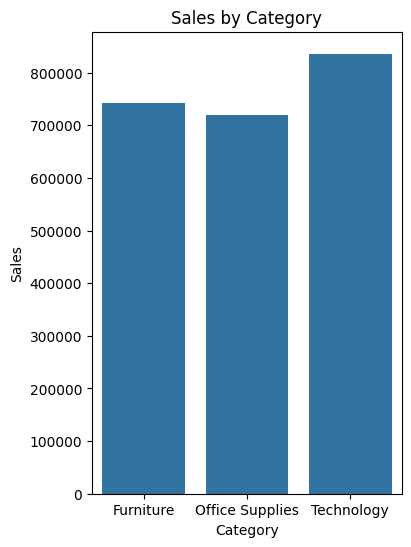

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='Category', y='Sales', data=orders, estimator=sum, ci=None)
plt.title("Sales by Category")
plt.show()


/tmp/ipython-input-2907918253.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub Category', y='Profit', data=orders, estimator=sum, ci=None)


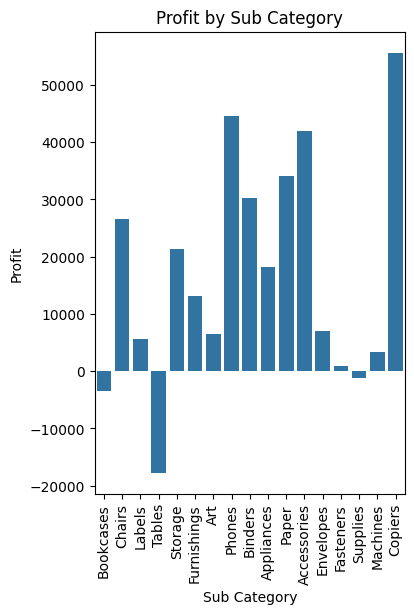

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='Sub Category', y='Profit', data=orders, estimator=sum, ci=None)
plt.title("Profit by Sub Category")
plt.xticks(rotation=90)
plt.show()
